In [8]:
import os
import importlib
from geeutils import geeutils
importlib.reload(geeutils)
from geeutils import tiffutils
importlib.reload(tiffutils)

data_dir = os.path.join('data')

# Retrieve imagery from GEE
This uses polygon geojsons saved for each site

In [9]:
start_date = '2019-05-01'
end_date = '2019-01-12'

# sitenames = ['hawaiikaunaoabayhawaii', 'hawaiikeawaikimakahaoahu', 'hawaiikoholalagoonoahu', 'hawaiinanakulistreamoahu', 'hawaiisharkscoveoahu', 'hawaiiternisland']
sitenames = os.listdir(os.path.join(data_dir, 'siteinfo'))
sitenames = ['hawaiikeawaikimakahaoahu']

In [10]:
for sitename in sitenames:

  geeutils.retrieve_imagery(sitename=sitename, 
                            start_date = start_date,
                            end_date = end_date,
                            data_dir  = data_dir, # this will be autogenerated with sitename
                            polygon = None#, # load this from the polygon file for the site
                          #   satnames = ['S2']#['L8', 'L7']
  )

ee.ImageCollection({
  "functionInvocationValue": {
    "functionName": "Collection.filter",
    "arguments": {
      "collection": {
        "functionInvocationValue": {
          "functionName": "Collection.filter",
          "arguments": {
            "collection": {
              "functionInvocationValue": {
                "functionName": "ImageCollection.load",
                "arguments": {
                  "id": {
                    "constantValue": "LANDSAT/LT05/C02/T1_TOA"
                  }
                }
              }
            },
            "filter": {
              "functionInvocationValue": {
                "functionName": "Filter.dateRangeContains",
                "arguments": {
                  "leftValue": {
                    "functionInvocationValue": {
                      "functionName": "DateRange",
                      "arguments": {
                        "end": {
                          "constantValue": "2019-01-12"
                        

EEException: Collection.reduceColumns: Empty date ranges not supported for the current operation.

# Clean up excess band tiff files

In [4]:
for sitename in sitenames:
    tiffutils.clean_up_gee_downloads(os.path.join(data_dir, 'sat_images', sitename))

L8-------------------------
S2-------------------------
L7-------------------------
L8-------------------------
S2-------------------------
L7-------------------------
L8-------------------------
S2-------------------------
L7-------------------------
L8-------------------------
S2-------------------------
L7-------------------------
L8-------------------------
S2-------------------------


hawaiikeawaikimakahaoahu-------------------------------------
data\sat_images\hawaiikeawaikimakahaoahu\L7\L7_20190507_064045.tif
(5, 54, 33)


c:\Users\jnicolow\Documents\research\CRC\GEE_image_download\geeutils\tiffutils.py:33: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
c:\Users\jnicolow\AppData\Local\anaconda3\envs\coastvision\lib\site-packages\matplotlib\cm.py:478: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


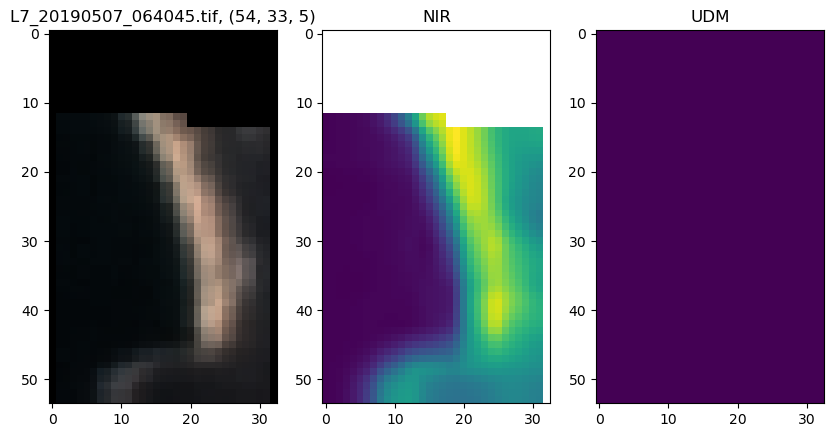

data\sat_images\hawaiikeawaikimakahaoahu\L8\L8_20190506_065045.tif
(5, 54, 33)


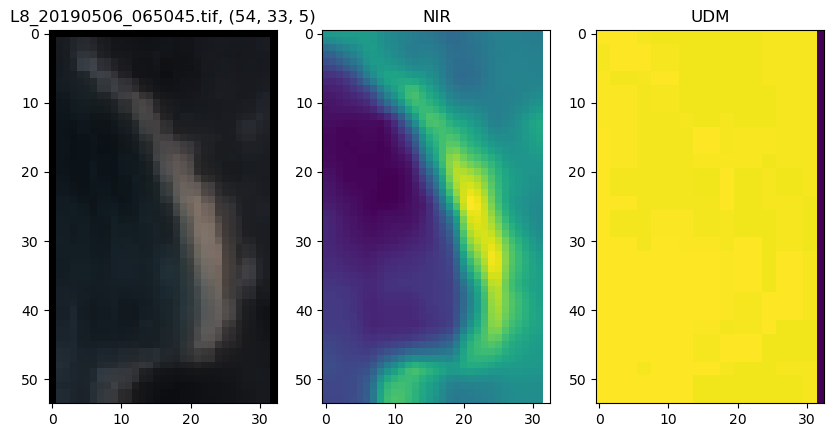

data\sat_images\hawaiikeawaikimakahaoahu\S2\S2_20190504_211929.tif
(5, 52, 31)


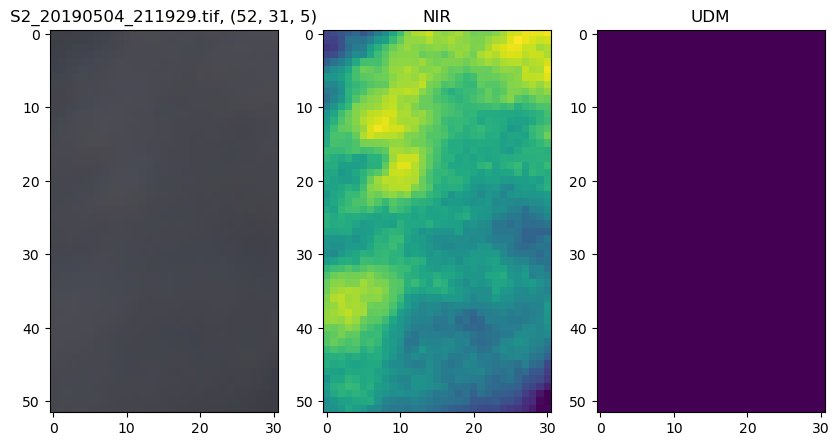

data\sat_images\hawaiikeawaikimakahaoahu\S2\S2_20190509_211921.tif
(5, 52, 31)


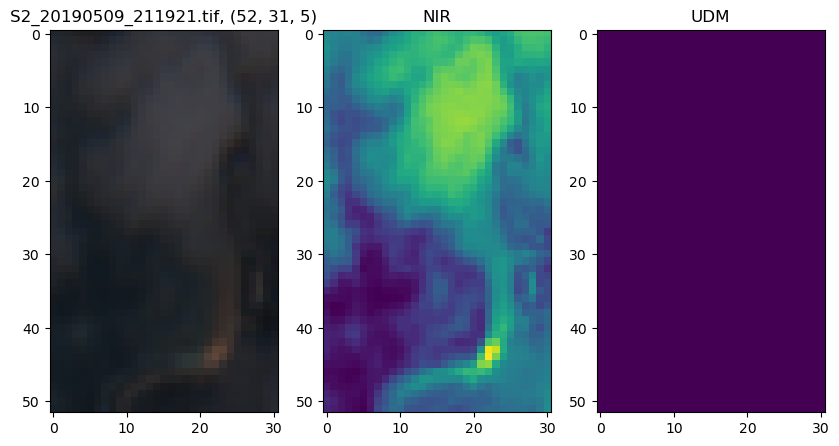

In [7]:
# this goes through and plots each tiff image
from glob import glob
for sitename in sitenames:
    print(f'{sitename}-------------------------------------')
    tiff_fns = glob(os.path.join('data', 'sat_images', sitename, '*', '*.tif'))
    for tiff_fn in tiff_fns:
        plot_scale = 1
        if 'S2' in tiff_fn:
            plot_scale = 10_000
        # else: continue
        print(tiff_fn)
        tiffutils.load_tiff_image(tiff_fn, plot=True, plot_scale=plot_scale)

